In [11]:
import pandas as pd

# Memuat data dari file yang diunggah
data = pd.read_csv('Padi.csv')

# Menampilkan lima baris pertama dari data
data.head()


,Provinsi,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,ACEH,1299699,1329536,1368074,1419128,1382905,1486909,1478712,1404580,1246614,...,1350748,1533369,1402287,1556858,1582393,1772962,1788738,1956940,1820062,2331046
1,SUMATERA UTARA,2918152,3079960,3134533,3136760,3212208,3321049,3451430,3514253,3291515,...,3007636,3265834,3340794,3527899,3582302,3607403,3715514,3727249,3631039,4044829
2,SUMATERA BARAT,1806424,1747543,1829192,1971180,1787719,1807622,1897678,1759059,1668955,...,1889489,1938120,1965634,2105790,2211248,2279602,2368390,2430384,2519020,2550609
3,RIAU,436297,445361,458756,461905,416135,370124,461630,431351,413391,...,42938,490087,494260,531429,574864,535788,512152,434144,385475,393917
4,JAMBI,607529,564722,593502,657650,572269,550277,553641,536779,556564,...,544597,58663,581704,644947,628828,646641,625164,664535,664720,541486


In [12]:
# Mengubah kolom dari 1993 hingga 2015 menjadi numerik
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Memeriksa informasi data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1   1993      26 non-null     float64
 2   1994      26 non-null     float64
 3   1995      26 non-null     float64
 4   1996      26 non-null     float64
 5   1997      26 non-null     float64
 6   1998      26 non-null     float64
 7   1999      26 non-null     float64
 8   2000      26 non-null     float64
 9   2001      29 non-null     float64
 10  2002      29 non-null     float64
 11  2003      30 non-null     float64
 12  2004      30 non-null     float64
 13  2005      33 non-null     float64
 14  2006      33 non-null     float64
 15  2007      33 non-null     float64
 16  2008      33 non-null     float64
 17  2009      33 non-null     float64
 18  2010      33 non-null     float64
 19  2011      33 non-null     float64
 20  2012      33 non-null     float64


In [13]:
# Memilih fitur dan target
X = data.drop(['Provinsi', '2015'], axis=1)
y = data['2015']


In [14]:
# Mengisi nilai NaN dengan median kolom
X = X.fillna(X.median())


In [15]:
from sklearn.model_selection import train_test_split

# Membagi data (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

# Menghitung MSE dan R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 225046552740.18826
R² Score: 0.920152473027875


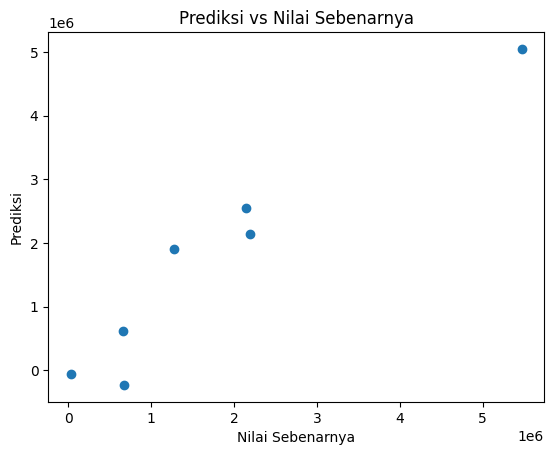

In [18]:
import matplotlib.pyplot as plt

# Plot prediksi vs nilai sebenarnya
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.show()
